## Classifying European Money Denominations

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import cv2
import os

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60
sns.set_style('darkgrid')
sns.set(font_scale=1.2)


#from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,StratifiedKFold
#from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
# from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
# from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential, save_model
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
# from tensorflow.keras.optimizers import Adam

#For ANN and DNN
import keras
from keras import models
from keras.models import save_model, load_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from keras.optimizers import Adam, Adagrad, RMSprop, SGD
from keras.regularizers import l1,l2,l1_l2

#For Convolutional Neural Networks
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

#For Transfer Learning
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications import imagenet_utils

#For Tuning
from keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)
tf.random.set_seed(0)

Autosaving every 60 seconds


## Image Exploration

## Data Exploration

In [2]:
os.getcwd()

'C:\\Users\\Dennis\\Desktop\\DL0320EN'

In [3]:
note100 = cv2.imread('train\\100\\40.jpeg')
note100

array([[[ 13,  11,  11],
        [ 13,  11,  11],
        [ 13,  11,  11],
        ...,
        [196, 191, 188],
        [199, 191, 191],
        [199, 191, 191]],

       [[ 13,  11,  11],
        [ 13,  11,  11],
        [ 13,  11,  11],
        ...,
        [193, 188, 185],
        [196, 188, 188],
        [196, 188, 188]],

       [[ 13,  11,  11],
        [ 13,  11,  11],
        [ 13,  11,  11],
        ...,
        [195, 190, 187],
        [198, 190, 190],
        [198, 190, 190]],

       ...,

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11]]

In [4]:
note100.shape

(283, 510, 3)

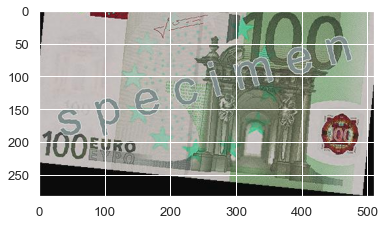

In [5]:
plt.imshow(note100)
plt.show()

In [6]:
note100.max()

255

In [7]:
new100 = cv2.resize(note100,dsize=(224,112))

In [8]:
new100.shape

(112, 224, 3)

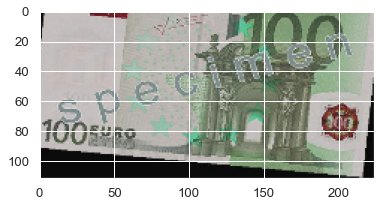

In [9]:
plt.imshow(new100)
plt.show()

In [10]:
note500 = cv2.imread('train\\500\\60.jpeg')
note500 = cv2.cvtColor(note500,cv2.COLOR_BGR2RGB)

In [11]:
note500.shape

(261, 510, 3)

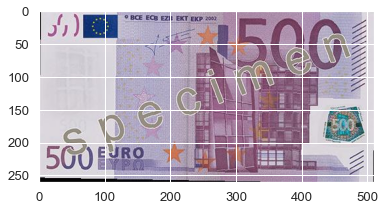

In [12]:
plt.imshow(note500)
plt.show()

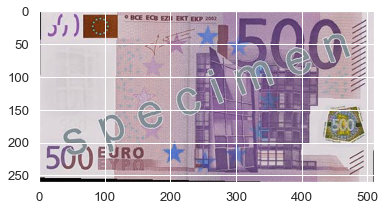

In [13]:
#GreyScale Image
plt.gray()
note500 = cv2.imread('train\\500\\60.jpeg')
plt.imshow(note500)
plt.show()

In [14]:
note500.max()

255

## Convolutional Neural Networks for Image Classification

### Data Preprocessing

#### Preprocessing Training Set

In [15]:
#No Data Augmentation

train_datagen = ImageDataGenerator()

In [ ]:
#No Data Augmentation

train_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Data Augmentation

train_datagen = ImageDataGenerator(rotation_range=30,  # rotate the image 30 degrees
                               width_shift_range=0.1,# Shift the pic width by a max of 10%
                               height_shift_range=0.1,# Shift the pic height by a max of 10%
                               rescale=1./255,# Rescale the image by normalizing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True,# All horizontal flipping
                               fill_mode= "nearest" # Fill in missing pixels with the nearest filled value
                                )

In [16]:
batch_size = 5
target_size = (112,112)
classes = ['5','10','20','50','100','200','500']
train_data_dir = 'train'
random_seed = 0

In [ ]:
os.listdir(train_data_dir)

In [17]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=target_size, classes=classes,
                                                    batch_size=batch_size, seed=random_seed,shuffle=True,
                                                    class_mode='categorical', color_mode='rgb')

Found 70 images belonging to 7 classes.


In [ ]:
len(train_generator)

In [ ]:
train_generator.class_indices

In [ ]:
# Generate a batch of 5 images and labels
train_images, train_labels = next(train_generator)

In [ ]:
train_images.shape

In [ ]:
train_labels.shape

In [ ]:
train_labels

In [ ]:
label_names = {0:'5', 1:'10',2:'20',3:'50',4:'100',5:'200',6:'500'}

#### Preprocessing Validation Set

In [18]:
batch_size = 5
target_size = (112,112)
classes = ['5','10','20','50','100','200','500']
valid_data_dir = 'validation'
random_seed = 0

In [19]:
#No Data Augmentation

valid_datagen = ImageDataGenerator()

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
valid_generator = valid_datagen.flow_from_directory(valid_data_dir, target_size=target_size, classes=classes,
                                                    batch_size=batch_size, seed=random_seed,shuffle=True,
                                                    class_mode='categorical', color_mode='rgb')

Found 70 images belonging to 7 classes.


In [ ]:
len(valid_generator)

In [ ]:
valid_generator.class_indices

#### Preprocessing Test Set

In [21]:
batch_size = 5
target_size = (112,112)
classes = ['5','10','20','50','100','200','500']
test_data_dir = 'test'
random_seed = 0

In [22]:
#No Data Augmentation

test_datagen = ImageDataGenerator()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=target_size, classes=classes,
                                                    batch_size=batch_size, seed=random_seed,shuffle=True,
                                                    class_mode='categorical', color_mode='rgb')

Found 70 images belonging to 7 classes.


In [ ]:
len(test_generator)

In [ ]:
test_generator.batch_size

## Visualize Dataset

### Plot out the images in the first batch

In [ ]:
test_batch = test_generator.next()[0]
test_batch

In [ ]:
type(test_batch)

In [ ]:
for image in range(0,5):
    plt.imshow(test_batch[image])
    plt.show()

In [ ]:
first_batch_valid = valid_generator.next()[0]
first_batch_valid

In [ ]:
for image in range(0,5):
    plt.imshow(first_batch_valid[image])
    plt.show()

### Plot all images

In [ ]:
L = 1
W = 5

fig, axes = plt.subplots(nrows=L, ncols=W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

## CNN Model Creation

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(112,112,3), 
                 activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

#model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

#model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# model.add(Dropout(0.2))

# model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1),activation='relu'))

# model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

#model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(units=7,activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 106, 106, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 359552)            0

In [26]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [27]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])

In [29]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [30]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath='cnnbest.h5',verbose=1,save_best_only=True)

### Model Training

In [ ]:
#steps_per_epoch = TotalTrainingSamples / TrainingBatchSize
#validation_steps = TotalvalidationSamples / ValidationBatchSize
#70 / 5 = 14
#70 / 5 = 14

In [ ]:
# results = model.fit_generator(train_generator,epochs=10,verbose=1,steps_per_epoch=112,
#                    validation_data=validation_generator,validation_steps=25)

In [ ]:
results = model.fit(train_generator,epochs=40,verbose=1,steps_per_epoch=14,
                   validation_data=valid_generator,validation_steps=14, callbacks=[checkpointer, earlystopping])

In [31]:
results = model.fit(train_generator,epochs=40,verbose=1,steps_per_epoch=train_generator.n//5,
                   validation_data=valid_generator,validation_steps=valid_generator.n//5,
                   callbacks=[checkpointer, earlystopping])

Epoch 1/40
14/14 [==============================] - ETA: 0s - loss: 1240.0022 - accuracy: 0.2286
Epoch 00001: val_loss improved from inf to 5.63963, saving model to cnnbest.h5
14/14 [==============================] - 10s 727ms/step - loss: 1240.0022 - accuracy: 0.2286 - val_loss: 5.6396 - val_accuracy: 0.3143
Epoch 2/40
14/14 [==============================] - ETA: 0s - loss: 2.3198 - accuracy: 0.5429
Epoch 00002: val_loss improved from 5.63963 to 3.45613, saving model to cnnbest.h5
14/14 [==============================] - 10s 687ms/step - loss: 2.3198 - accuracy: 0.5429 - val_loss: 3.4561 - val_accuracy: 0.3571
Epoch 3/40
14/14 [==============================] - ETA: 0s - loss: 0.9277 - accuracy: 0.8000
Epoch 00003: val_loss improved from 3.45613 to 3.23852, saving model to cnnbest.h5
14/14 [==============================] - 11s 768ms/step - loss: 0.9277 - accuracy: 0.8000 - val_loss: 3.2385 - val_accuracy: 0.5000
Epoch 4/40
14/14 [==============================] - ETA: 0s - loss: 0.4

### Model Evaluation

In [32]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
hist_df = pd.DataFrame(results.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,1240.002197,0.228571,5.639629,0.314286
1,2.319836,0.542857,3.456127,0.357143
2,0.927726,0.800000,3.238519,0.500000
3,0.454571,0.885714,2.074576,0.457143
4,0.181825,0.957143,2.469836,0.571429
5,0.089188,0.942857,2.754881,0.614286
6,0.028383,1.000000,2.921745,0.628571
7,0.001199,1.000000,3.368506,0.685714
8,0.080878,0.985714,2.797211,0.542857
9,0.076544,1.000000,3.587935,0.628571


In [35]:
hist_df.to_csv("cnnhistory.csv", index=False)

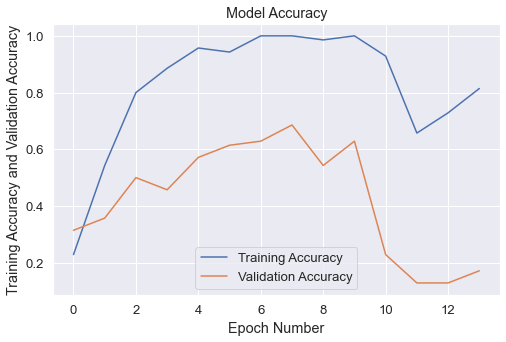

In [36]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

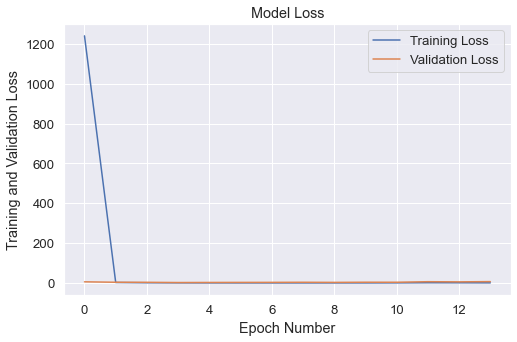

In [37]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
evaluate = model.evaluate(test_generator, steps=14, verbose=1)
evaluate

In [38]:
evaluate = model.evaluate(test_generator, steps=test_generator.n//5,verbose=1)
evaluate

14/14 [==============================] - 1s 76ms/step - loss: 6.9970 - accuracy: 0.1857


[6.997039794921875, 0.18571428954601288]

In [39]:
print("Accuracy Test:{}".format(evaluate[1]))

Accuracy Test:0.18571428954601288


### Model Prediction

#### Method 1: By individual sampled test images

In [ ]:
train_generator.class_indices

In [ ]:
test_img = image.load_img('69.jpeg', target_size=(112,112))

In [ ]:
test_img = image.img_to_array(test_img)

In [ ]:
test_img

In [ ]:
test_img.shape

In [ ]:
test_img_grey = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)

In [ ]:
test_img_grey.shape

In [ ]:
test_img_grey = np.expand_dims(test_img_grey,axis=0)

In [ ]:
test_img_grey.shape

In [ ]:
test_img_grey = test_img_grey/255

In [ ]:
model.predict_classes(test_img_grey)

In [ ]:
model.predict(test_img_grey)

#### Method 2: Predict by batch test images

In [40]:
y_pred = model.predict(test_generator,steps=14,verbose=1)

14/14 [==============================] - 1s 74ms/step


In [ ]:
y_pred[:10]

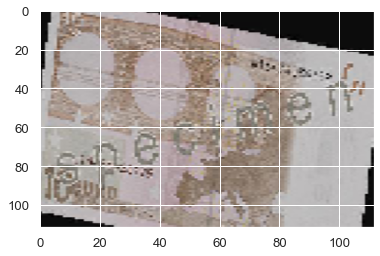

predicted: 50 (Incorrectly classified)


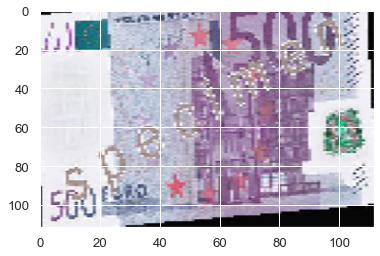

predicted: 50 (Incorrectly classified)


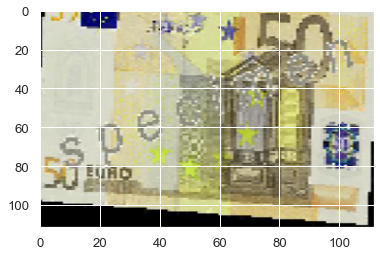

predicted: 500 (Incorrectly classified)


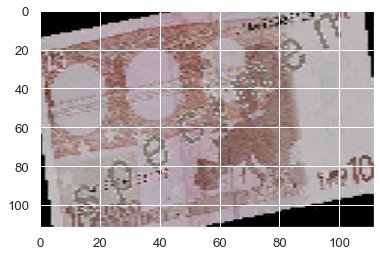

predicted: 500 (Incorrectly classified)


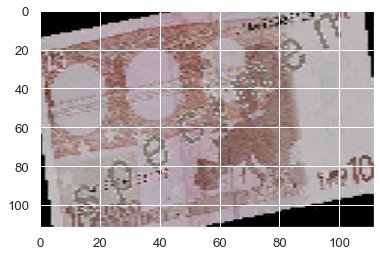

predicted: 500 (Incorrectly classified)


In [41]:
# Plot five random images and their predictions

np.random.seed(0)
numbers = [np.random.randint(0, 69) for i in range(0, 5)]

pred = np.argmax(model.predict(test_generator)[numbers], axis=1)

class_labels = train_generator.class_indices

pred_labels = [list(class_labels.keys())[list(class_labels.values()).index(i)] for i in pred]

true_labels = [test_generator.filenames[i].split('/')[0] for i in numbers]

ndx = 0
for i in numbers:
    result_string = 'predicted: {}'.format(pred_labels[ndx])
    if pred_labels[ndx] == true_labels[ndx]:
        result_string += ' (Correctly classified)'
    else:
        result_string += ' (Incorrectly classified)'
    plt.imshow(test_generator[i // 5][0][i % 5].astype(np.uint8), aspect='auto')
    plt.show()
    print(result_string)
    ndx += 1

In [ ]:
prediction = []
original = []
image = []

for i in range(len(os.listdir(test_data_dir))):
  for item in os.listdir(os.path.join(test_data_dir,str(i))):
    img= cv2.imread(os.path.join(test_data_dir,str(i),item))
    img = cv2.resize(img,(224,224))
    image.append(img)
    img = img / 255
    img = img.reshape(-1,224,224,3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

## Save the Model

In [ ]:
#model.save("cnn.h5")

## Transfer Learning

### LeNet Model

#### Preprocessing Training Set

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=30,  # rotate the image 30 degrees
                               width_shift_range=0.1,# Shift the pic width by a max of 10%
                               height_shift_range=0.1,# Shift the pic height by a max of 10%
                               rescale=1./255,# Rescale the image by normalizing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True,# All horizontal flipping
                               fill_mode= "nearest" # Fill in missing pixels with the nearest filled value
                                )

In [ ]:
batch_size = 2
target_size = (32,32)
classes = ['5','10','20','50','100','200','500']
train_data_dir = 'train'
random_seed = 0

In [ ]:
os.listdir(train_data_dir)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=target_size, classes=classes,
                                                    batch_size=batch_size, seed=random_seed,shuffle=True,
                                                    class_mode='categorical', color_mode='rgb')

In [ ]:
len(train_generator)

In [ ]:
train_generator.class_indices

In [ ]:
train_images, train_labels = next(train_generator)

In [ ]:
train_images.shape

In [ ]:
train_labels.shape

In [ ]:
train_labels

In [ ]:
label_names = {0:'5', 1:'10',2:'20',3:'50',4:'100',5:'200',6:'500'}

#### Preprocessing Validation Set

In [ ]:
batch_size = 2
target_size = (32,32)
classes = ['5','10','20','50','100','200','500']
valid_data_dir = 'validation'
random_seed = 0

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
valid_generator = valid_datagen.flow_from_directory(valid_data_dir, target_size=target_size, classes=classes,
                                                    batch_size=batch_size, seed=random_seed,
                                                    class_mode='categorical', color_mode='rgb')

In [ ]:
len(valid_generator)

In [ ]:
valid_generator.class_indices

#### Preprocessing Test Set

In [ ]:
batch_size = 2
target_size = (32,32)
classes = ['5','10','20','50','100','200','500']
test_data_dir = 'test'
random_seed = 0

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=target_size, classes=classes,
                                                    batch_size=batch_size, seed=random_seed,
                                                    class_mode='categorical', color_mode='rgb')

In [ ]:
len(test_generator)

In [ ]:
test_generator.batch_size

In [ ]:
lenet = Sequential()

lenet.add(Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),activation='relu',input_shape=(32,32,3)))
lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

lenet.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'))
lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

lenet.add(Flatten())

lenet.add(Dense(units=120, activation='relu'))

lenet.add(Dense(units=84, activation='relu'))

lenet.add(Dense(units=7,activation='softmax'))

In [ ]:
lenet.summary()

In [ ]:
lenet.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [ ]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath='lenetbest.h5',verbose=1,save_best_only=True)

In [ ]:
results = lenet.fit(train_generator,epochs=20,verbose=1,steps_per_epoch=35,
                   validation_data=valid_generator,validation_steps=35, callbacks=[checkpointer, earlystopping])

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
lenet.save("lenet.h5")

### VGG16 Model

In [ ]:
vgg16 = VGG16(include_top=False, weights='imagenet',classifier_activation='softmax', input_shape=(112,112,3))

In [ ]:
vgg16.summary()

In [ ]:
# Set parameters in pre-train model to False
for layer in vgg16.layers[:-2]:
    layer.trainable = False


In [ ]:
#Create FC Layer for output

modelvgg16 = models.Sequential()
modelvgg16.add(vgg16)
modelvgg16.add(Flatten())
modelvgg16.add(Dense(units=128,activation='relu'))
modelvgg16.add(Dropout(0.2))
modelvgg16.add(Dense(units=7,activation='softmax'))

In [ ]:
modelvgg16.summary()

In [ ]:
#vgg16.trainable = False

In [ ]:
modelvgg16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [ ]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath='vgg16best.h5',verbose=1,save_best_only=True)

In [ ]:
results = modelvgg16.fit(train_generator,epochs=30,verbose=1,steps_per_epoch=14,
                   validation_data=valid_generator,validation_steps=14, callbacks=[checkpointer, earlystopping])

### VGG16 Evaluation

In [ ]:
modelvgg16.metrics_names

In [ ]:
hist_df = pd.DataFrame(results.history)
hist_df

In [ ]:
hist_df.to_csv("vgg16history.csv", index=False)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
modelvgg16.evaluate(test_generator, steps=14, verbose=1)

### VGG16 Prediction

In [ ]:
y_pred = modelvgg16.predict(test_generator,steps=14,verbose=1)

In [ ]:
y_pred[:10]

In [ ]:
# Plot five random images and their predictions

np.random.seed(0)
numbers = [np.random.randint(0, 69) for i in range(0, 5)]

pred = np.argmax(modelvgg16.predict(test_generator,14)[numbers], axis=1)

class_labels = train_generator.class_indices

pred_labels = [list(class_labels.keys())[list(class_labels.values()).index(i)] for i in pred]

true_labels = [test_generator.filenames[i].split('/')[0] for i in numbers]

ndx = 0
for i in numbers:
    result_string = 'predicted: {}'.format(pred_labels[ndx])
    if pred_labels[ndx] == true_labels[ndx]:
        result_string += ' (Correctly classified)'
    else:
        result_string += ' (Incorrectly classified)'
    plt.imshow(test_generator[i // 5][0][i % 5].astype(np.uint8), aspect='auto')
    plt.show()
    print(result_string)
    ndx += 1

### VGG19 Model

In [ ]:
vgg19 = VGG19(include_top=False, weights='imagenet',classifier_activation='softmax', input_shape=(224,224,3))

In [ ]:
vgg19.summary()

In [ ]:
# Set parameters in pre-train model to False
for layer in vgg19.layers[:-2]:
    layer.trainable = False


In [ ]:
#Create FC Layer for output

modelvgg19 = models.Sequential()
modelvgg19.add(vgg19)
modelvgg19.add(Flatten())
modelvgg19.add(Dense(units=128,activation='relu'))
modelvgg19.add(Dropout(0.2))
modelvgg19.add(Dense(units=7,activation='softmax'))

In [ ]:
modelvgg19.summary()

In [ ]:
#vgg19.trainable = False

In [ ]:
modelvgg19.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [ ]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath='vgg19best.h5',verbose=1,save_best_only=True)

In [ ]:
results = modelvgg19.fit(train_generator,epochs=40,verbose=1,steps_per_epoch=14,
                   validation_data=valid_generator,validation_steps=14, callbacks=[checkpointer, earlystopping])

### VGG19 Evaluation

In [ ]:
modelvgg19.metrics_names

In [ ]:
hist_df = pd.DataFrame(results.history)
hist_df

In [ ]:
hist_df.to_csv("vgg19history.csv", index=False)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
modelvgg19.evaluate(test_generator, steps=14, verbose=1)

### Resnet50 Model

In [42]:
resnet50 = ResNet50(include_top=False,weights='imagenet',input_shape=(112,112,3))

In [43]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 112, 112, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 118, 118, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 56, 56, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 56, 56, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [44]:
# Set parameters in pre-train model to False
for layer in resnet50.layers[:-10]:
    layer.trainable = False


In [45]:
#Create FC Layer for output

modelresnet50 = models.Sequential()
modelresnet50.add(resnet50)
modelresnet50.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
modelresnet50.add(Flatten())
modelresnet50.add(Dense(units=128,activation='relu'))
modelresnet50.add(Dropout(0.2))
modelresnet50.add(Dense(units=7,activation='softmax'))

In [46]:
modelresnet50.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 2048)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4194432   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 903       
Total params: 27,783,047
Trainable params: 8,660,999
Non-trainable params: 19,122,048
__________________________________

In [47]:
#resnet50.trainable = False

In [48]:
modelresnet50.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [49]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [50]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath='resnet50best.h5',verbose=1,save_best_only=True)

In [51]:
results = modelresnet50.fit(train_generator,epochs=40,verbose=1,steps_per_epoch=14,
                   validation_data=valid_generator,validation_steps=14, callbacks=[checkpointer, earlystopping])

Epoch 1/40
14/14 [==============================] - ETA: 0s - loss: 17.9336 - accuracy: 0.4714
Epoch 00001: val_loss improved from inf to 32.48373, saving model to resnet50best.h5
14/14 [==============================] - 7s 506ms/step - loss: 17.9336 - accuracy: 0.4714 - val_loss: 32.4837 - val_accuracy: 0.5143
Epoch 2/40
14/14 [==============================] - ETA: 0s - loss: 2.3016 - accuracy: 0.8000
Epoch 00002: val_loss did not improve from 32.48373
14/14 [==============================] - 5s 392ms/step - loss: 2.3016 - accuracy: 0.8000 - val_loss: 53.9790 - val_accuracy: 0.4714
Epoch 3/40
14/14 [==============================] - ETA: 0s - loss: 0.3836 - accuracy: 0.9429
Epoch 00003: val_loss improved from 32.48373 to 28.75838, saving model to resnet50best.h5
14/14 [==============================] - 6s 424ms/step - loss: 0.3836 - accuracy: 0.9429 - val_loss: 28.7584 - val_accuracy: 0.5571
Epoch 4/40
14/14 [==============================] - ETA: 0s - loss: 0.6687 - accuracy: 0.9286

Epoch 29/40
14/14 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00029: val_loss did not improve from 1.33641
14/14 [==============================] - 6s 443ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.4737 - val_accuracy: 0.8714
Epoch 30/40
14/14 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 00030: val_loss did not improve from 1.33641
14/14 [==============================] - 6s 407ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.1683 - val_accuracy: 0.9000
Epoch 31/40
14/14 [==============================] - ETA: 0s - loss: 0.4489 - accuracy: 0.9714
Epoch 00031: val_loss improved from 1.33641 to 1.21484, saving model to resnet50best.h5
14/14 [==============================] - 6s 431ms/step - loss: 0.4489 - accuracy: 0.9714 - val_loss: 1.2148 - val_accuracy: 0.9286
Epoch 32/40
14/14 [==============================] - ETA: 0s - loss: 5.8411e-07 - accuracy: 1.0000
Epoch 00032: val_loss did

### ResNet50 Evaluation

In [52]:
model.metrics_names

['loss', 'accuracy']

In [53]:
hist_df = pd.DataFrame(results.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,1.793359e+01,0.471429,32.483727,0.514286
1,2.301626e+00,0.800000,53.978996,0.471429
2,3.835687e-01,0.942857,28.758381,0.557143
3,6.687241e-01,0.928571,13.446178,0.700000
4,2.122299e-01,0.942857,7.614723,0.771429
5,9.629641e-02,0.985714,6.185051,0.785714
6,1.607764e+00,0.914286,7.228746,0.785714
7,3.378223e-01,0.985714,7.218810,0.785714
8,4.417751e-02,0.985714,11.159963,0.685714
9,6.626788e-03,1.000000,9.728859,0.757143


In [54]:
hist_df.to_csv("resnet50history.csv", index=False)

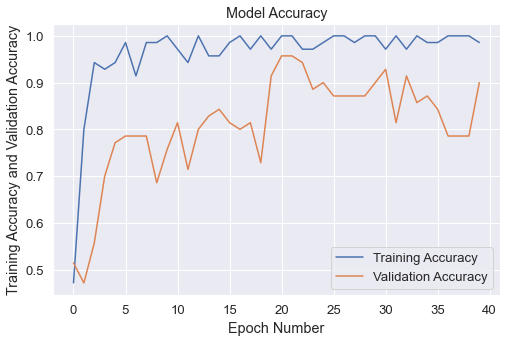

In [55]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

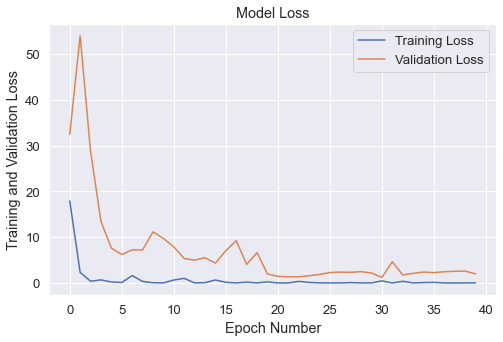

In [56]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [57]:
modelresnet50.evaluate(test_generator, steps=14, verbose=1)

14/14 [==============================] - 2s 155ms/step - loss: 1.1558 - accuracy: 0.9429


[1.155801773071289, 0.9428571462631226]

### ResNet50 Prediction

In [58]:
y_pred = modelresnet50.predict(test_generator,steps=14,verbose=1)

14/14 [==============================] - 2s 154ms/step


In [ ]:
y_pred[:10]

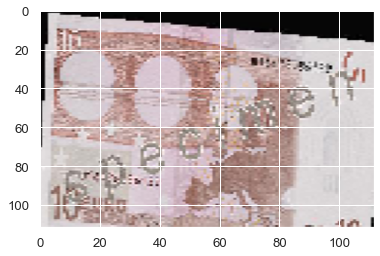

predicted: 200 (Incorrectly classified)


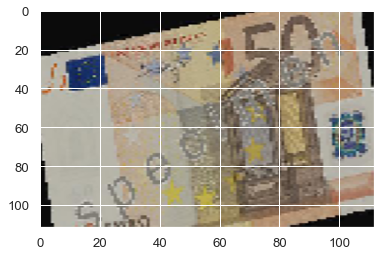

predicted: 5 (Incorrectly classified)


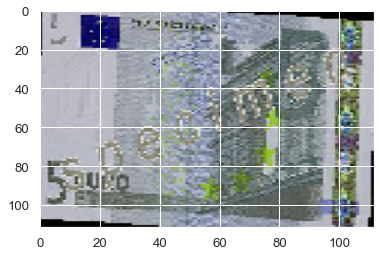

predicted: 100 (Incorrectly classified)


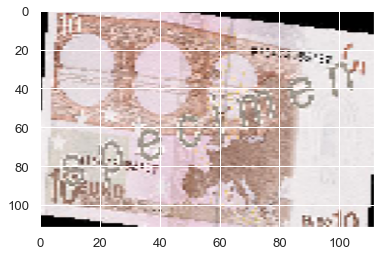

predicted: 10 (Incorrectly classified)


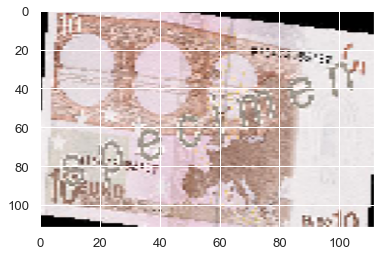

predicted: 10 (Incorrectly classified)


In [59]:
# Plot five random images and their predictions

np.random.seed(0)
numbers = [np.random.randint(0, 69) for i in range(0, 5)]

pred = np.argmax(modelresnet50.predict(test_generator,14)[numbers], axis=1)

class_labels = train_generator.class_indices

pred_labels = [list(class_labels.keys())[list(class_labels.values()).index(i)] for i in pred]

true_labels = [test_generator.filenames[i].split('/')[0] for i in numbers]

ndx = 0
for i in numbers:
    result_string = 'predicted: {}'.format(pred_labels[ndx])
    if pred_labels[ndx] == true_labels[ndx]:
        result_string += ' (Correctly classified)'
    else:
        result_string += ' (Incorrectly classified)'
    plt.imshow(test_generator[i // 5][0][i % 5].astype(np.uint8), aspect='auto')
    plt.show()
    print(result_string)
    ndx += 1

### InceptionV3 Model

In [ ]:
incept = InceptionV3(include_top=False,weights='imagenet',input_shape=(224,112,3))

In [ ]:
incept.summary()

In [ ]:
# Set parameters in pre-train model to False
for layer in incept.layers[:-10]:
    layer.trainable = False


In [ ]:
#Create FC Layer for output

modelinception = models.Sequential()
modelinception.add(incept)
modelinception.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
modelinception.add(Flatten())
modelinception.add(Dense(units=256,activation='relu'))
modelinception.add(Dropout(0.3))
modelinception.add(Dense(units=7,activation='softmax'))

In [ ]:
modelinception.summary()

In [ ]:
#modelinception.trainable = False

In [ ]:
modelinception.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [ ]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath='inceptionbest.h5',verbose=1,save_best_only=True)

In [ ]:
results = modelinception.fit(train_generator,epochs=40,verbose=1,steps_per_epoch=14,
                   validation_data=valid_generator,validation_steps=14, callbacks=[checkpointer, earlystopping])

### InceptionV3 Evaluation

In [ ]:
modelinception.metrics_names

In [ ]:
results.history.keys()

In [ ]:
hist_df = pd.DataFrame(results.history)
hist_df

In [ ]:
hist_df.to_csv("inceptionhistory.csv", index=False)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
modelinception.evaluate(test_generator, steps=14, verbose=1)

###  InceptionV3 Prediction

In [ ]:
y_pred = modelinception.predict(test_generator,steps=14,verbose=1)

In [ ]:
y_pred[:10]

In [ ]:
# Plot five random images and their predictions

np.random.seed(0)
numbers = [np.random.randint(0, 69) for i in range(0, 5)]

pred = np.argmax(modelinception.predict(test_generator,14)[numbers], axis=1)

class_labels = train_generator.class_indices

pred_labels = [list(class_labels.keys())[list(class_labels.values()).index(i)] for i in pred]

true_labels = [test_generator.filenames[i].split('/')[0] for i in numbers]

ndx = 0
for i in numbers:
    result_string = 'predicted: {}'.format(pred_labels[ndx])
    if pred_labels[ndx] == true_labels[ndx]:
        result_string += ' (Correctly classified)'
    else:
        result_string += ' (Incorrectly classified)'
    plt.imshow(test_generator[i // 5][0][i % 5].astype(np.uint8), aspect='auto')
    plt.show()
    print(result_string)
    ndx += 1